In [217]:
import polars as pl
import matplotlib.pyplot as plt

Trainclinicalpath = "Desktop/QubeChallenge/ModifiedData/TrainDataset/Trainclinical.csv"
Trainmolecularpath = "Desktop/QubeChallenge/ModifiedData/TrainDataset/Trainmolecular.csv"
Ytrainpath = "Desktop/QubeChallenge/ModifiedData/TrainDataset/Ytrain.csv"

Trainclinicaldf = pl.read_csv(Trainclinicalpath)
Trainmoleculardf = pl.read_csv(Trainmolecularpath)
Ytraindf = pl.read_csv(Ytrainpath)

In [218]:
Testclinicalpath = "Desktop/QubeChallenge/ModifiedData/TestDataset/Testclinical.csv"
Testmolecularpath = "Desktop/QubeChallenge/ModifiedData/TestDataset/Testmolecular.csv"

Testclinicaldf = pl.read_csv(Testclinicalpath)
Testmoleculardf = pl.read_csv(Testmolecularpath)

for c in Testclinicaldf.columns:
    if "MONOCYTES" in c:
        Testclinicaldf = Testclinicaldf.with_columns(Testclinicaldf[c].cast(pl.Float64))

In [222]:
Trainclinicaldf

Normalized(BM_BLAST),Normalized(WBC),Normalized(ANC),Normalized(MONOCYTES),Normalized(HB),Normalized(PLT),Normal_Count,Normal,Female,Male,Lost_Y,Lost_X,Translocations,Additional,Derivative,Marker,Deletion
f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
-0.391645,0.094156,0.264513,0.0,-0.535749,1.598581,1,0,0,0,0,0,0,0,0,0,1
-0.522957,0.065856,-0.073464,0.0,-0.045831,1.317601,1,0,0,0,0,0,0,0,0,0,1
1.184102,-0.384023,-0.529829,0.0,-0.486758,-0.883406,0,0,0,0,0,0,1,0,1,0,1
-0.391645,-0.388902,-0.325515,0.0,-1.417602,3.618958,1,0,0,0,0,0,0,0,0,0,0
-0.522957,-0.412323,-0.384709,0.0,0.934005,-0.174267,1,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.790165,-0.442575,-0.508824,-0.283471,0.787029,-0.709466,1,0,0,0,0,0,0,0,0,0,0
1.184102,-0.452334,-0.527919,-0.358476,0.640054,1.444711,1,0,0,0,0,0,0,0,0,0,0
-0.12902,-0.413299,-0.432445,-0.208465,0.689046,-0.823196,1,0,0,0,0,0,0,0,0,0,0


In [220]:
Testclinicaldf

Normalized(BM_BLAST),Normalized(WBC),Normalized(ANC),Normalized(MONOCYTES),Normalized(HB),Normalized(PLT),Normal_Count,Normal,Female,Male,Lost_Y,Lost_X,Translocations,Additional,Derivative,Marker,Deletion
f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
3.185188,-0.187497,-0.369236,0.0,-0.540424,-0.446771,0,0,0,1,0,0,0,0,0,0,1
1.275235,-0.200559,-0.268331,0.0,0.519286,-0.54519,1,0,0,1,0,0,1,1,1,0,1
0.0,0.245472,0.880077,0.0,1.534841,-0.588248,0,0,1,0,0,0,0,0,0,0,0
2.780046,-0.085907,-0.14279,0.0,-0.363806,-0.471376,0,1,0,0,0,0,0,0,0,0,0
-0.634718,-0.295861,-0.345835,0.0,-0.098879,-0.575946,0,0,0,1,0,0,0,0,0,1,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0


In [205]:
#Trainmoleculardf

In [206]:
#Testmoleculardf

n_unique= 140 n_null= 109


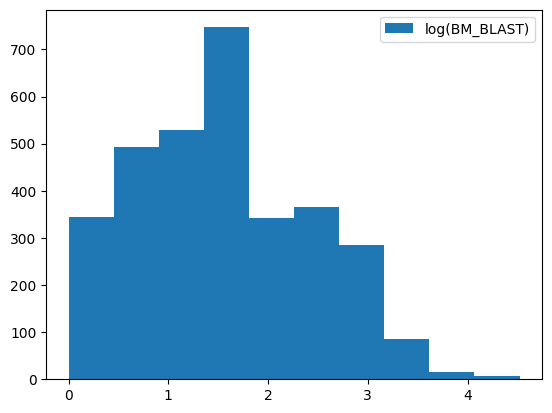

n_unique= 700 n_null= 272


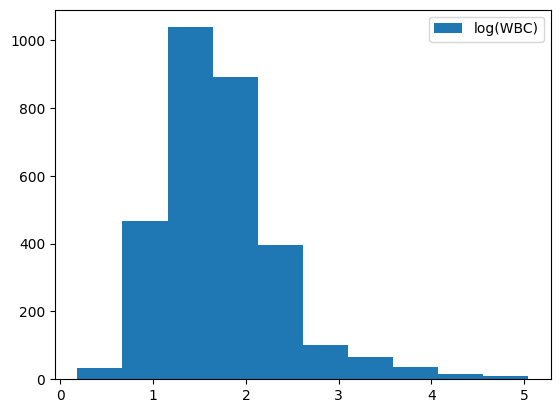

n_unique= 1027 n_null= 193


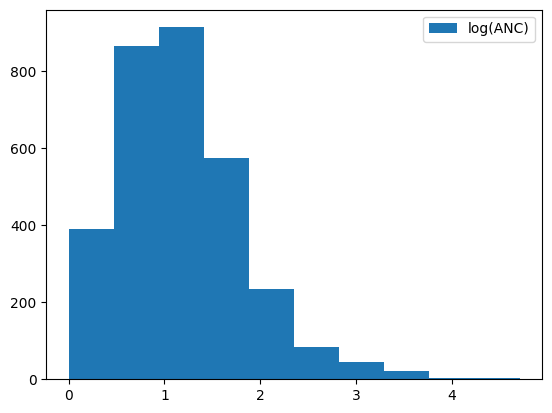

n_unique= 610 n_null= 601


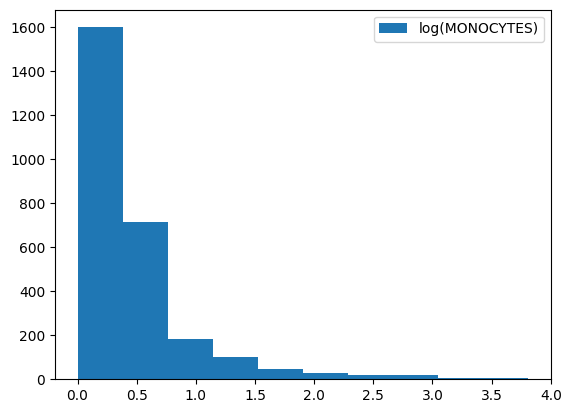

n_unique= 587 n_null= 124


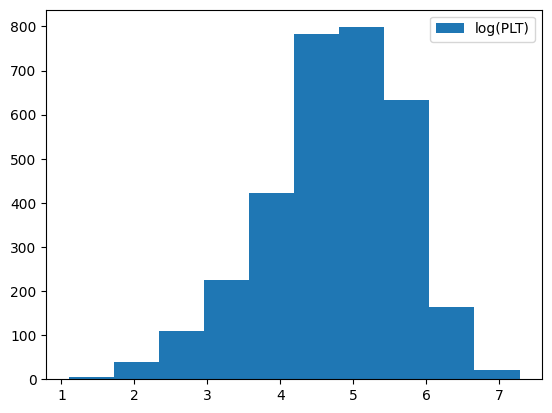

n_unique= 140 n_null= 109


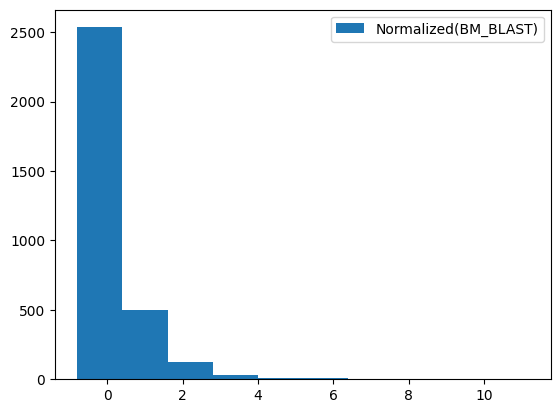

n_unique= 700 n_null= 272


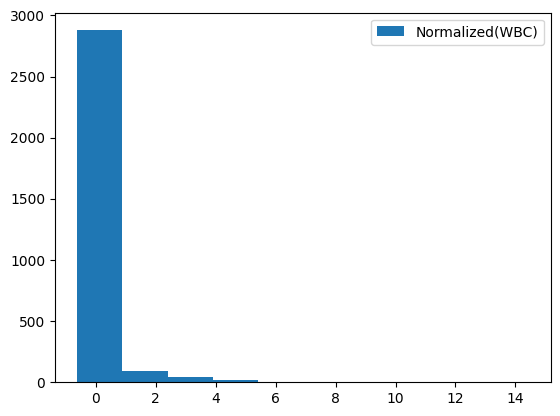

n_unique= 1027 n_null= 193


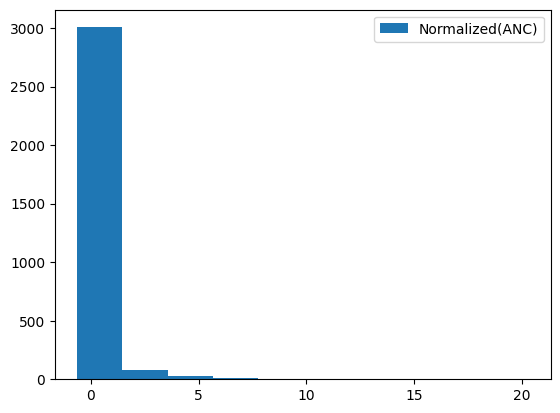

n_unique= 610 n_null= 601


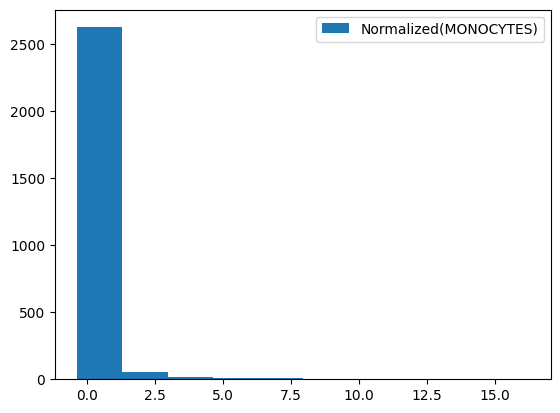

n_unique= 240 n_null= 110


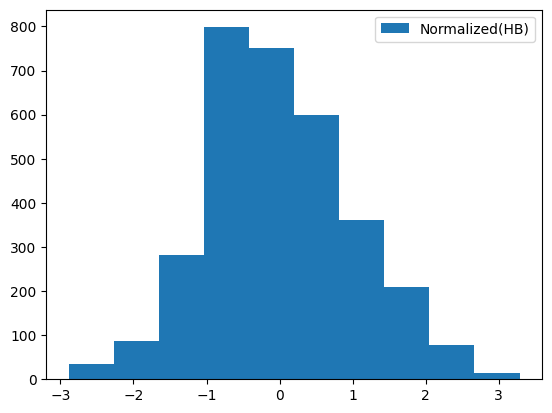

n_unique= 587 n_null= 124


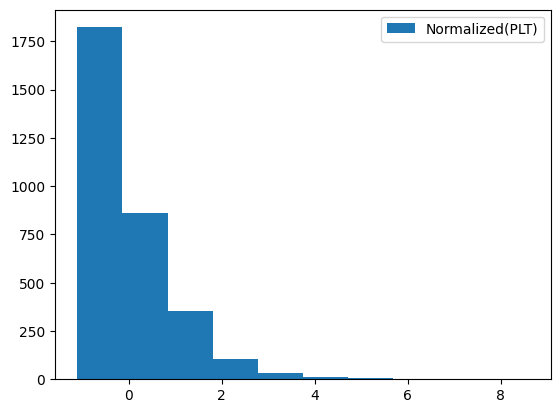

n_unique= 140 n_null= 109


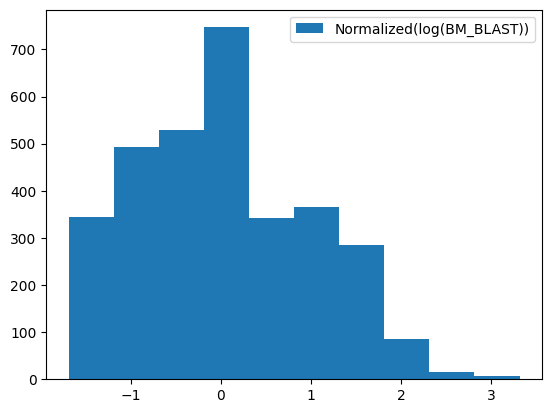

n_unique= 700 n_null= 272


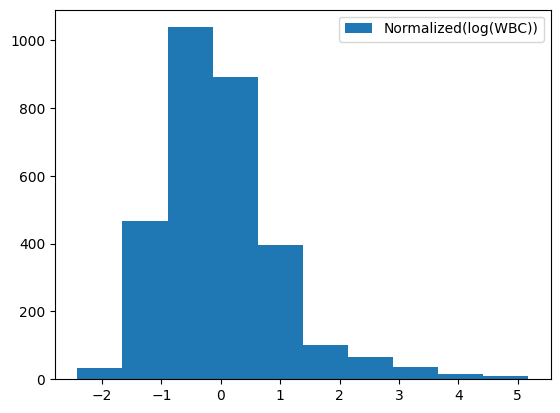

n_unique= 1027 n_null= 193


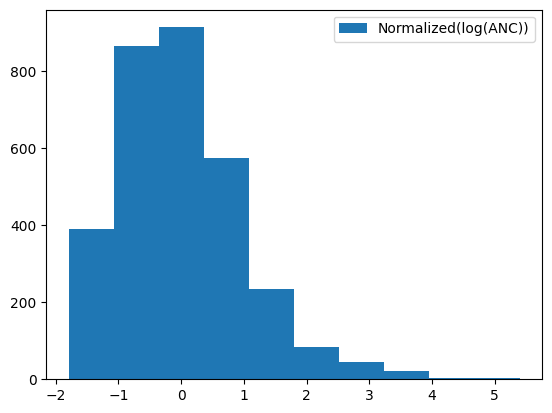

n_unique= 610 n_null= 601


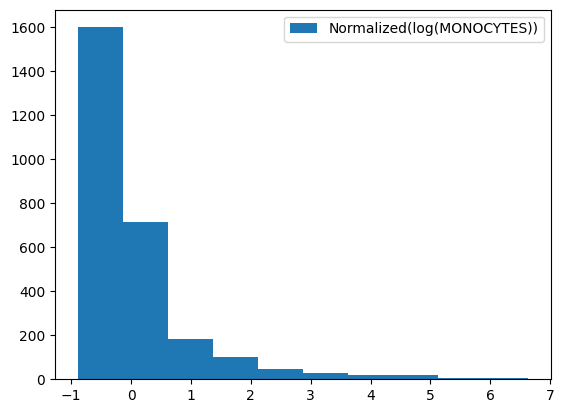

n_unique= 587 n_null= 124


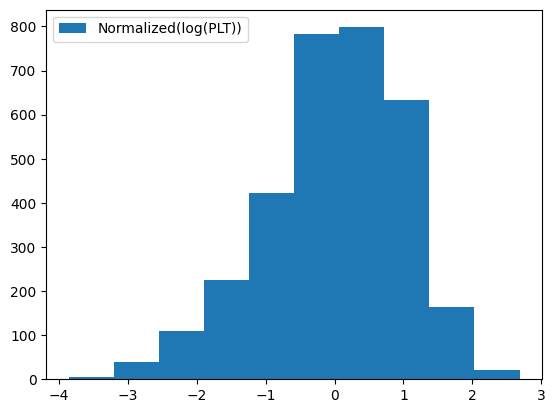

In [207]:
for c in Trainclinicaldf.columns:
    if c=="ID" or c=="CYTOGENETICS":
        pass
    else:
        print("n_unique=", Trainclinicaldf[c].n_unique(), "n_null=", Trainclinicaldf[c].null_count())
        plt.hist(Trainclinicaldf[c], label = c)
        plt.legend()
        plt.show()

n_unique= 83 n_null= 115


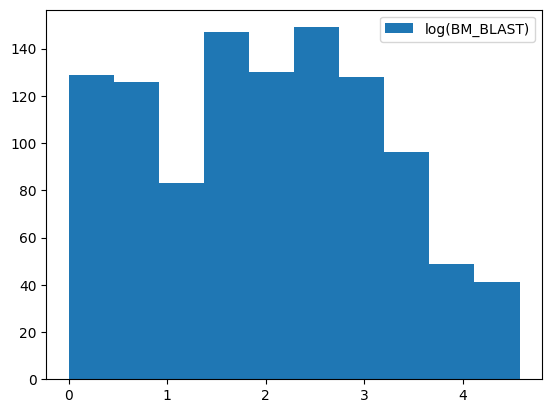

n_unique= 459 n_null= 112


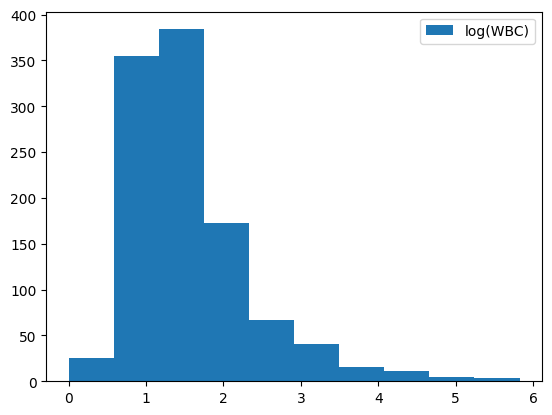

n_unique= 938 n_null= 141


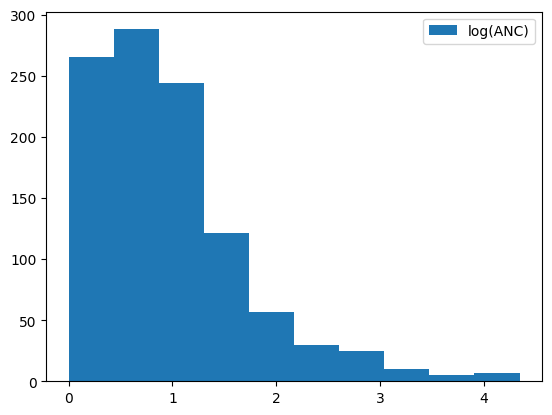

n_unique= 272 n_null= 883


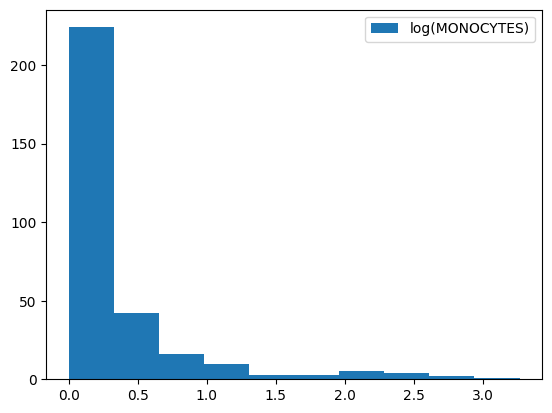

n_unique= 322 n_null= 115


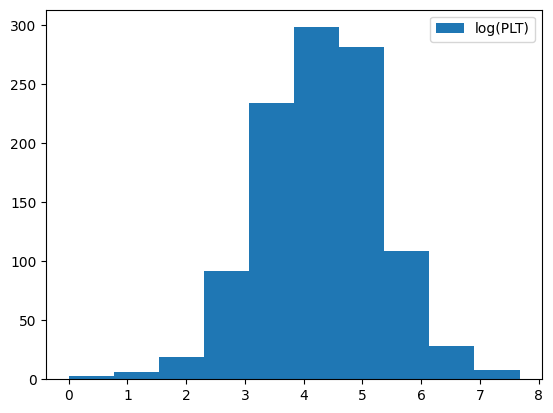

n_unique= 83 n_null= 115


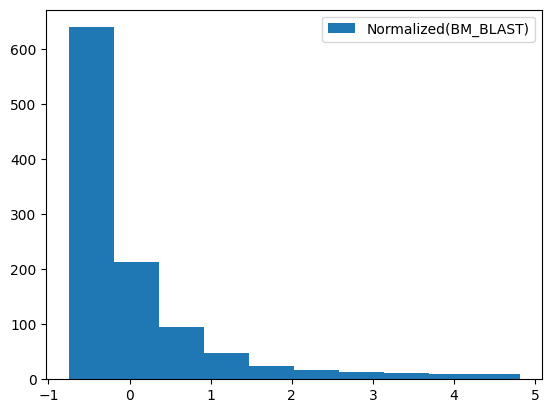

n_unique= 459 n_null= 112


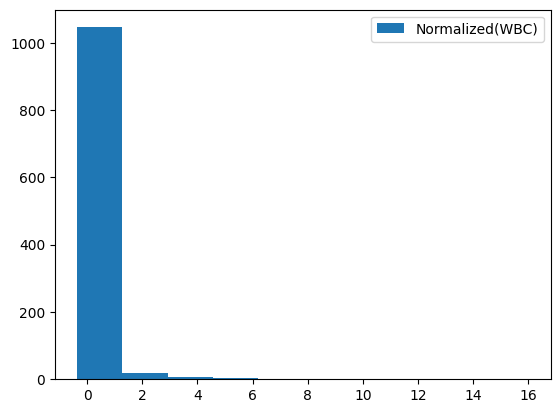

n_unique= 938 n_null= 141


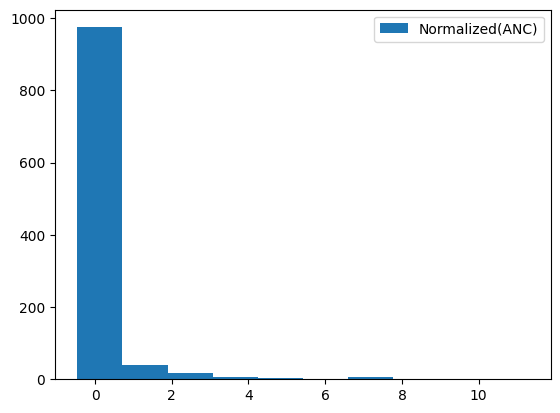

n_unique= 272 n_null= 883


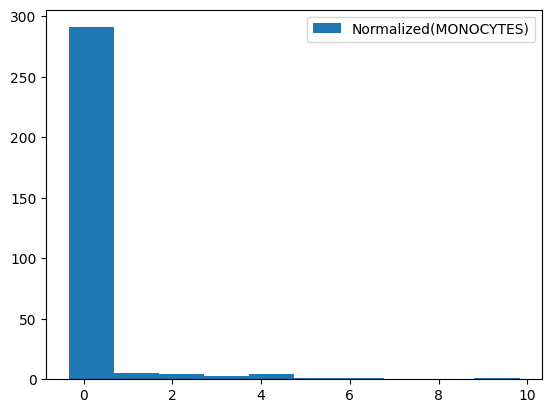

n_unique= 120 n_null= 111


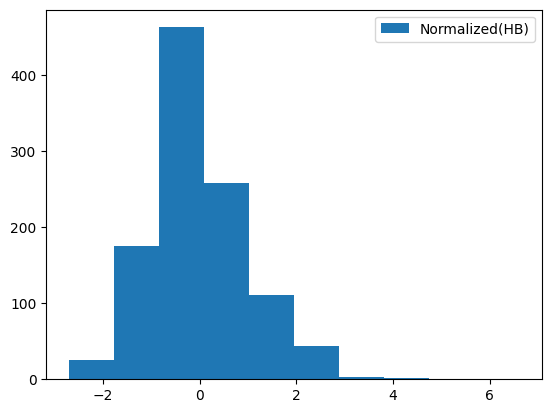

n_unique= 322 n_null= 115


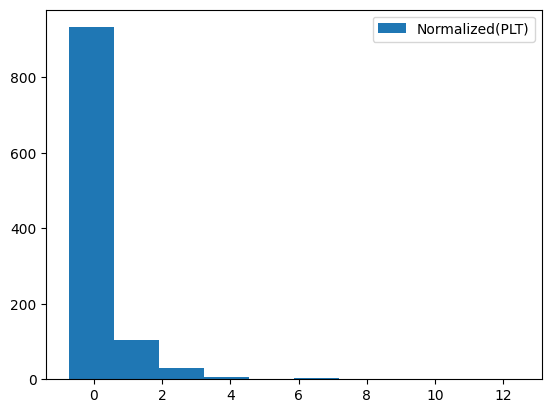

n_unique= 83 n_null= 115


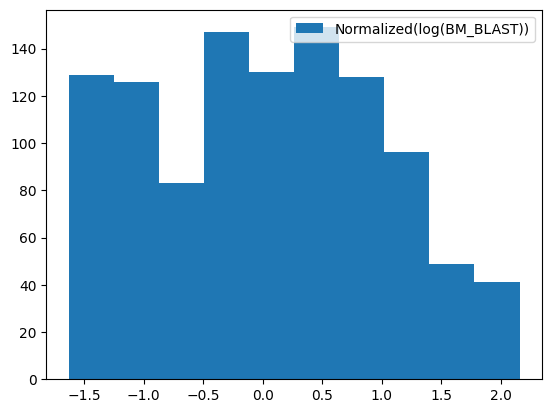

n_unique= 459 n_null= 112


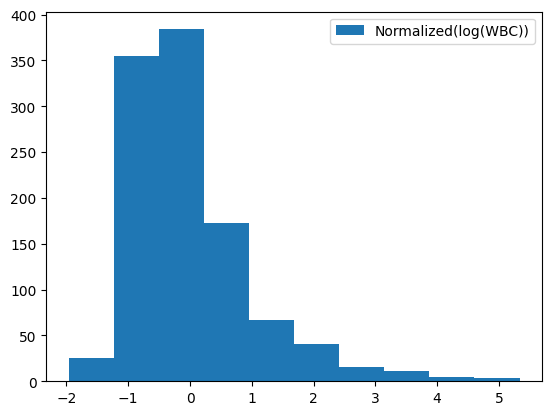

n_unique= 938 n_null= 141


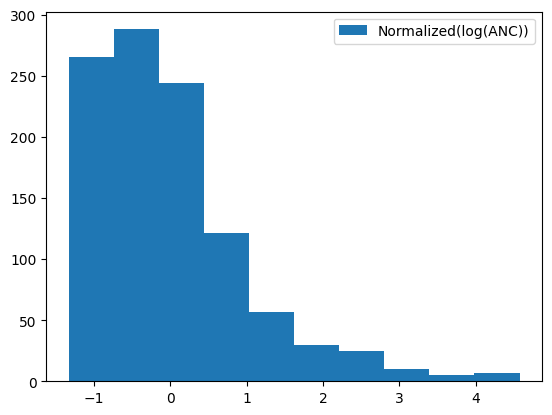

n_unique= 272 n_null= 883


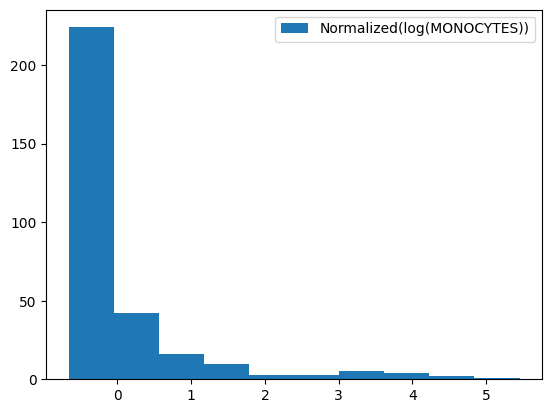

n_unique= 322 n_null= 115


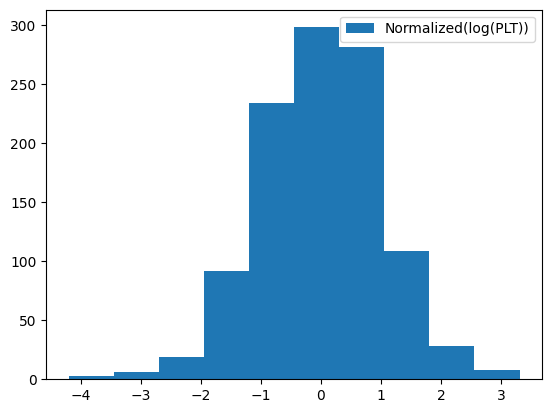

In [208]:
for c in Testclinicaldf.columns:
    if c=="ID" or c=="CYTOGENETICS":
        pass
    else:
        print("n_unique=", Testclinicaldf[c].n_unique(), "n_null=", Testclinicaldf[c].null_count())
        plt.hist(Testclinicaldf[c], label = c)
        plt.legend()
        plt.show()